In [39]:
!pip install scipy

  Using cached scipy-1.10.1-cp39-cp39-win_amd64.whl (42.5 MB)



[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [92]:
import numpy as np
import cv2 
from PIL import Image
import pandas as pd
import os 
import time
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d


In [7]:
image = cv2.imread(r"D:\programlanguages\python-\vspython\spectroscopy-project\sdbs-data\alcohol\793.jpg")
image

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

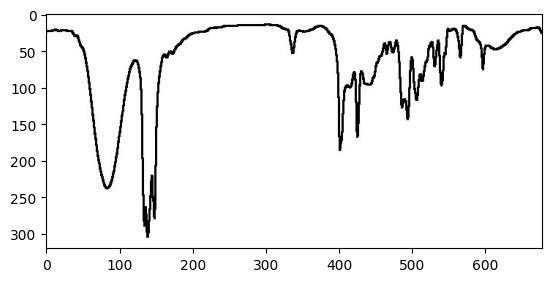

In [10]:
kernel = np.ones((3, 3), np.uint8)
eroded = cv2.erode(image,kernel)

plt.imshow(eroded)

In [79]:
x,y = np.where(np.all(image == [0,0,0],axis=2))


vals = np.asarray(tuple(zip(x,y)))
vals

array([[ 15, 299],
       [ 15, 300],
       [ 15, 301],
       ...,
       [302, 139],
       [304, 138],
       [304, 139]], dtype=int64)

In [90]:
vals[0,1]

2240

In [86]:
def getvals():
    c  = 0
    for i in range(vals.shape[0]-1):
        if vals[i+1,1] != vals[i,1]:
            yield [vals[i,0],vals[i,1]]
            c =+ 1
        else:
            pass
    
        

In [89]:
c =  [i for i in getvals()]
xy = np.asarray(c)
xi = xy[:,0]
yi = xy[:,1]

2229

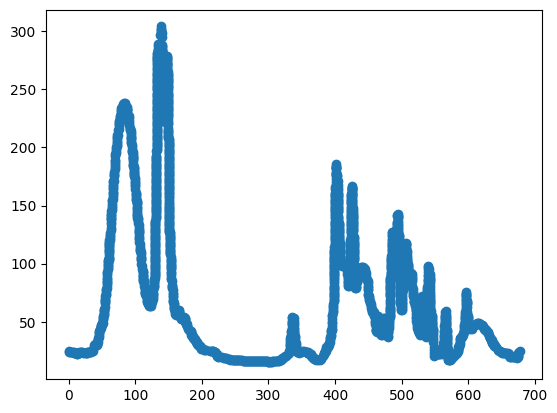

In [88]:
plt.scatter(yi,xi)

In [97]:
f = interp1d(xi,yi,kind='linear')

xnew = np.linspace(15,300,num=100)
ynew = f(xnew)

d:\programlanguages\python-\vspython\advanced-cv\cvision\lib\site-packages\scipy\interpolate\_interpolate.py:698: RuntimeWarning: divide by zero encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
d:\programlanguages\python-\vspython\advanced-cv\cvision\lib\site-packages\scipy\interpolate\_interpolate.py:701: RuntimeWarning: invalid value encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo


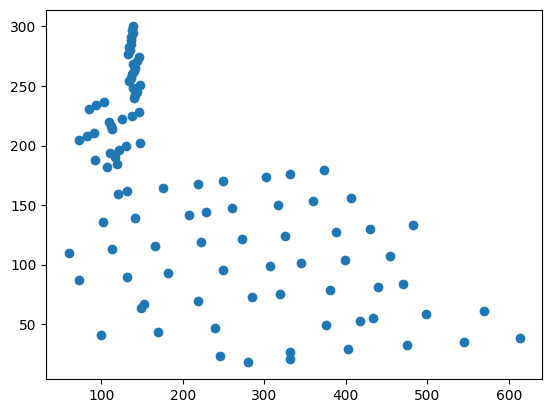

In [98]:
plt.scatter(ynew,xnew)

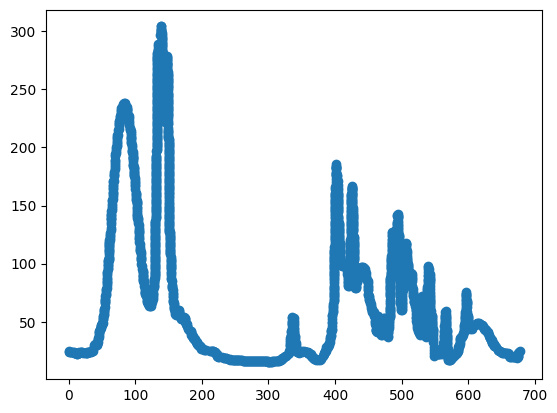

In [84]:
plt.scatter(vals[:,1],vals[:,0])